In [1]:
from keras.datasets import cifar10
from keras.models import model_from_json
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K

import cv2

Using TensorFlow backend.


In [2]:
num_classes = 10
model_name = 'models/50_model.json'
weights_name = 'weights/50_weights.h5'

In [3]:
def predict(x, model):
    pred = model.predict(np.array([x]), batch_size=1)
    pred_class = np.argmax(pred)
    pred_per = max(pred[0])
    
    return pred_class, pred_per

In [4]:
# データの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 正規化
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train_catego = to_categorical(y_train, num_classes)
y_test_catego = to_categorical(y_test, num_classes)

50000 train samples
10000 test samples


In [5]:
adv_test = np.load('npy/advs_test_50_model.npy')

print(adv_test.shape[0], 'adv test samples')

10000 adv test samples


In [6]:
model = model_from_json(open(model_name).read())
model.load_weights(weights_name)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

W0113 17:46:05.774914 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0113 17:46:05.803025 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0113 17:46:05.866543 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0113 17:46:05.871850 140736235160512 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0113 

In [7]:
score = model.evaluate(x_test, y_test_catego, verbose=0)
print('x_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

x_test
Test loss : 0.6737617537498474
Test accuracy : 0.8067


In [8]:
score = model.evaluate(adv_test, y_test_catego, verbose=0)
print('adv_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

adv_test
Test loss : 3.852466136550903
Test accuracy : 0.329


In [9]:
label =['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

adv_test


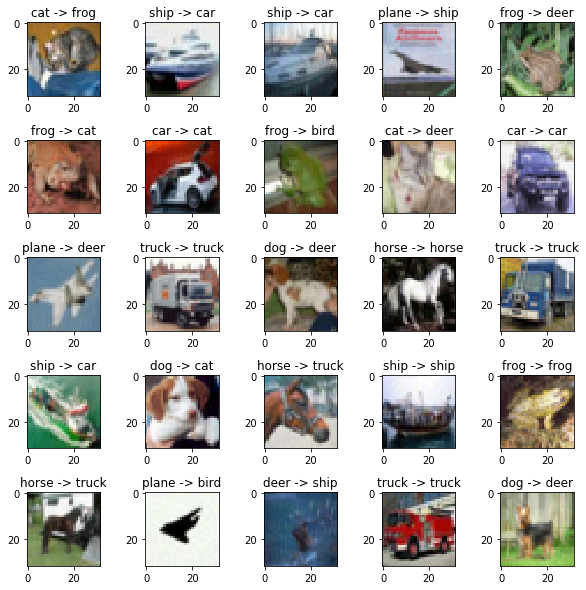

In [10]:
print('adv_test')
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(25):
    cifar_img=plt.subplot(5,5,i+1)
    
    img = adv_test[i]
    pred_class, pred_per = predict(img, model)
    plt.imshow(img)
    plt.title(f'{label[int(y_test[i])]} -> {label[pred_class]}')

plt.show()

x_test


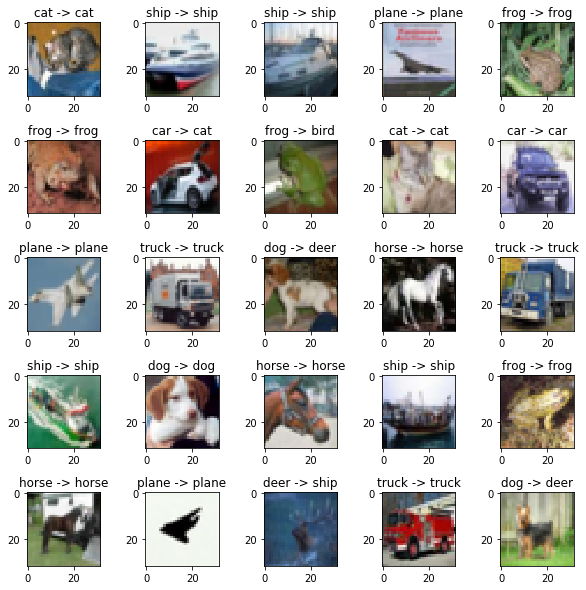

In [11]:
print('x_test')
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(25):
    cifar_img=plt.subplot(5,5,i+1)
    
    img = x_test[i]
    pred_class, pred_per = predict(img, model)
    plt.imshow(img)
    plt.title(f'{label[int(y_test[i])]} -> {label[pred_class]}')

plt.show()

In [12]:
def bgr_to_gray(x_list):
    gray_list = []

    for x in x_list:
        gray_x = cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
        gray_x = cv2.cvtColor(gray_x, cv2.COLOR_GRAY2BGR)
        gray_list.append(gray_x)
        
    return np.array(gray_list)

In [13]:
gray_test = bgr_to_gray(x_test)
gray_test.shape

(10000, 32, 32, 3)

In [14]:
score = model.evaluate(gray_test, y_test_catego, verbose=0)
print('gray_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

gray_test
Test loss : 0.8209093229293823
Test accuracy : 0.7634


In [15]:
gray_adv_test = bgr_to_gray(adv_test)
gray_adv_test.shape

(10000, 32, 32, 3)

In [16]:
score = model.evaluate(gray_adv_test, y_test_catego, verbose=0)
print('gray_adv_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

gray_adv_test
Test loss : 2.869921026611328
Test accuracy : 0.4028


gray_adv_test


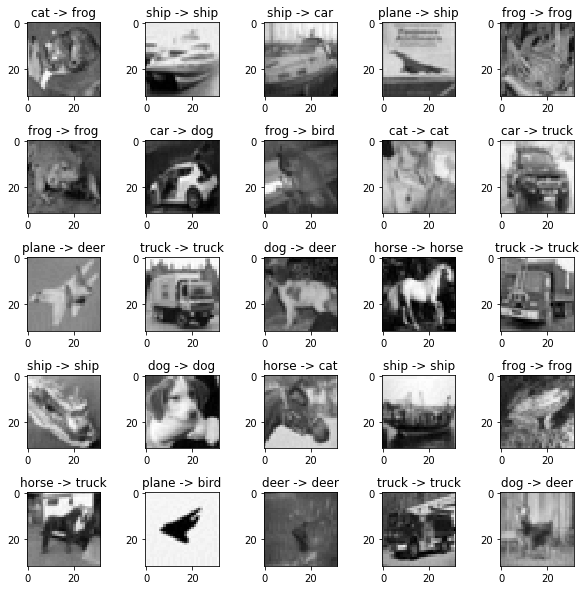

In [17]:
print('gray_adv_test')
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(25):
    cifar_img=plt.subplot(5,5,i+1)
    
    img = gray_adv_test[i]
    pred_class, pred_per = predict(img, model)
    plt.imshow(img)
    plt.title(f'{label[int(y_test[i])]} -> {label[pred_class]}')

plt.show()

gray_test


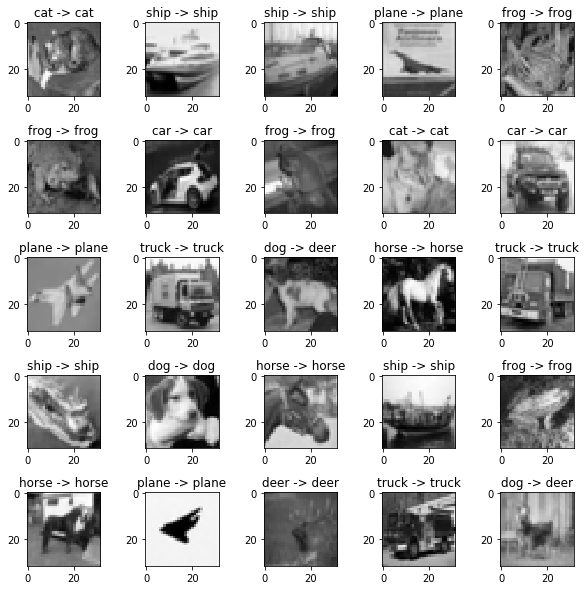

In [18]:
print('gray_test')
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(25):
    cifar_img=plt.subplot(5,5,i+1)
    
    img = gray_test[i]
    pred_class, pred_per = predict(img, model)
    plt.imshow(img)
    plt.title(f'{label[int(y_test[i])]} -> {label[pred_class]}')

plt.show()